Libraries

In [79]:
# Importing all of the necessary packages to read and display data, spatial data, and interactive maps
import pandas as pd
import geopandas as gpd
import matplotlib
import folium
import mapclassify

Data

In [80]:
# Reading in the Former Municipality Boundaries Data file and reprojecting (geometry will be in metres)
fmbd_old = gpd.read_file('data/Former Municipality Boundaries Data.geojson')
fmbd = fmbd_old.to_crs("EPSG:26917")
# Reading in the Community Shelters file and reprojecting (geometry will be in metres)
shelters_old = gpd.read_file("data/shelters.geojson")
shelters = shelters_old.to_crs("EPSG:26917")
# Reading in the Waste Transfer Station file and reprojecting (geometry will be in metres)
waste_old = gpd.read_file("data/waste.geojson")
waste = waste_old.to_crs("EPSG:26917")

Functions

def buffer_sjoin(fmbd_w_shelters = fmbd.sjoin(shelters))


,ADDRESS_PO,ADDRESS_FU,POSTAL_COD,MUNICIPALI,CITY,CENTRELINE,OBJECTID_left,WARD,NEIGHBOURH,NEIGHBOU_1,...,_id,AREA_ID,DATE_EFFECTIVE,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,OBJECTID_right
0,808260,70 Gerrard St E,M5B1G6,former TORONTO,Toronto,1143800,44,Toronto Centre-Rosedale (27),75,Church-Yonge Corridor,...,6,760645.0,,760645.0,49886.0,04,04,TORONTO,TORONTO,14035041
1,9531684,3410 Bayview Ave,M2M3S3,NORTH YORK,Toronto,9531674,45,Willowdale (24),50,Newtonbrook East,...,2,643704.0,,643704.0,49886.0,08,08,NORTH YORK,NORTH YORK,11678465
2,2591634,87 Pembroke St,M5A2N9,former TORONTO,Toronto,14020526,46,Toronto Centre-Rosedale (27),73,Moss Park,...,6,760645.0,,760645.0,49886.0,04,04,TORONTO,TORONTO,14035041
3,8067796,129 Peter St,M5V2H3,former TORONTO,Toronto,20139637,47,Trinity-Spadina (20),77,Waterfront Communities-The Islands,...,6,760645.0,,760645.0,49886.0,04,04,TORONTO,TORONTO,14035041
4,6362877,191 Spadina Rd,M5R2T9,former TORONTO,Toronto,6362837,48,Trinity-Spadina (20),95,Annex,...,6,760645.0,,760645.0,49886.0,04,04,TORONTO,TORONTO,14035041


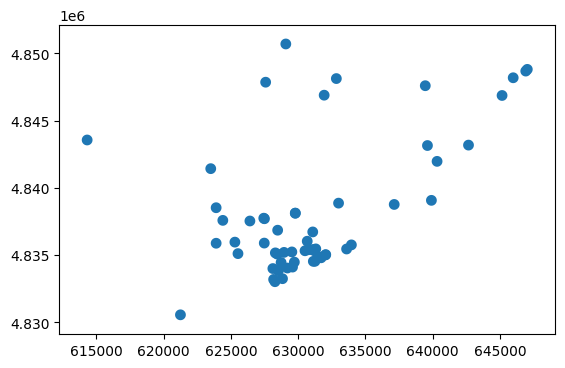

In [94]:
shelter_buffers= shelters.buffer(400).plot()
shelters_w_fmbd = shelters.sjoin(fmbd, how = "inner", predicate = "intersects")
shelters_w_fmbd.head()